#  Carter-Penrose diagram of Schwarzschild spacetime based on Frolov-Novikov coordinates

This worksheet demonstrates a few capabilities of [SageManifolds](http://sagemanifolds.obspm.fr)
(version 1.0, as included in SageMath 7.5) in computations regarding the Carter-Penrose diagram of Schwarzschild spacetime. It is used to illustrate the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.0/SM_Carter-Penrose_diag_FN.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this worksheet:

In [1]:
version()

'SageMath version 7.5.rc1, Release Date: 2016-12-28'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M')
print(M)

4-dimensional differentiable manifold M


## The Schwarzschild-Droste domain

The domain of Schwarzschild-Droste coordinates is $M_{\rm SD} = M_{\rm I} \cup M_{\rm II}$:

In [4]:
M_SD = M.open_subset('M_SD', latex_name=r'M_{\rm SD}')
M_I = M_SD.open_subset('M_I', latex_name=r'M_{\rm I}')
M_II = M_SD.open_subset('M_II', latex_name=r'M_{\rm II}')
M_SD.declare_union(M_I, M_II)

The Schwarzschild-Droste coordinates $(t,r,\theta,\phi)$:

In [5]:
X_SD.<t,r,th,ph> = M_SD.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
m = var('m', domain='real') ; assume(m>=0)
X_SD.add_restrictions(r!=2*m)
X_SD

Chart (M_SD, (t, r, th, ph))

In [6]:
X_SD_I = X_SD.restrict(M_I, r>2*m) ; X_SD_I 

Chart (M_I, (t, r, th, ph))

In [7]:
X_SD_II = X_SD.restrict(M_II, r<2*m) ; X_SD_II

Chart (M_II, (t, r, th, ph))

In [8]:
M.default_chart()

Chart (M_SD, (t, r, th, ph))

In [9]:
M.atlas()

[Chart (M_SD, (t, r, th, ph)),
 Chart (M_I, (t, r, th, ph)),
 Chart (M_II, (t, r, th, ph))]

## Kruskal-Szekeres coordinates

In [10]:
X_KS.<T,X,th,ph> = M.chart(r'T X th:(0,pi):\theta ph:(0,2*pi):\phi')
X_KS.add_restrictions(T^2 < 1 + X^2)
X_KS

Chart (M, (T, X, th, ph))

In [11]:
X_KS_I = X_KS.restrict(M_I, [X>0, T<X, T>-X]) ; X_KS_I 

Chart (M_I, (T, X, th, ph))

In [12]:
X_KS_II = X_KS.restrict(M_II, [T>0, T>abs(X)]) ; X_KS_II

Chart (M_II, (T, X, th, ph))

In [13]:
SD_I_to_KS = X_SD_I.transition_map(X_KS_I, [sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)), 
                                            sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), 
                                            th, ph])
SD_I_to_KS.display()

T = sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
X = sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

In [14]:
SD_II_to_KS = X_SD_II.transition_map(X_KS_II, [sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)), 
                                               sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), 
                                               th, ph])
SD_II_to_KS.display()

T = sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
X = sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

### Plot of Schwarzschild-Droste grid on $M_{\rm I}$ in terms of KS coordinates

In [15]:
graph = X_SD_I.plot(X_KS, ambient_coords=(X,T), fixed_coords={th:pi/2,ph:pi}, 
                    ranges={t:(-10,10), r:(2.001,5)}, steps={t:1, r:0.5}, 
                    style={t:'--', r:'-'}, color='blue', parameters={m:1})

Adding the Schwarzschild horizon to the plot:

In [16]:
hor = line([(0,0), (4,4)], color='black', thickness=2) \
      + text(r'$\mathscr{H}$', (3, 2.7), fontsize=20, color='black')

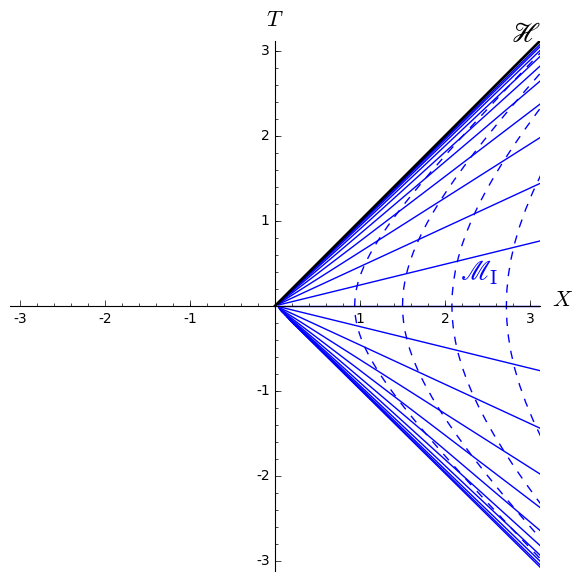

In [17]:
hor2 = line([(0,0), (4,4)], color='black', thickness=2) \
      + text(r'$\mathscr{H}$', (2.95, 3.2), fontsize=20, color='black')
region_labels = text(r'$\mathscr{M}_{\rm I}$', (2.4, 0.4), fontsize=20, color='blue') 
graph2 = graph + hor2 + region_labels
show(graph2, xmin=-3, xmax=3, ymin=-3, ymax=3)

Adding the curvature singularity $r=0$ to the plot:

In [18]:
sing = X_SD_II.plot(X_KS, fixed_coords={r:0, th:pi/2, ph:pi}, ambient_coords=(X,T), 
                    color='brown', thickness=4, style='--', parameters={m:1}) \
       + text(r'$r=0$', (2.5, 3), rotation=45, fontsize=16, color='brown')

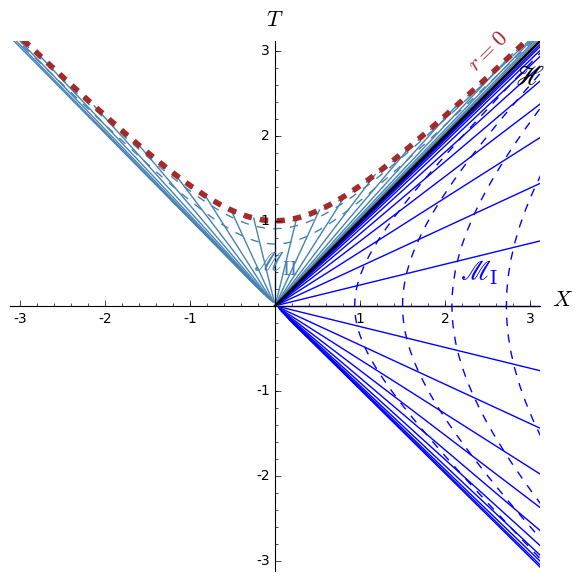

In [19]:
graph += X_SD_II.plot(X_KS, ambient_coords=(X,T), fixed_coords={th:pi/2,ph:pi}, 
                      ranges={t:(-10,10), r:(0.001,1.999)}, steps={t:1, r:0.5}, 
                      style={t:'--', r:'-'}, color='steelblue', parameters={m:1})
region_labels = text(r'$\mathscr{M}_{\rm I}$', (2.4, 0.4), fontsize=20, color='blue') + \
                text(r'$\mathscr{M}_{\rm II}$', (0, 0.5), fontsize=20, color='steelblue') 
graph += hor + sing + region_labels
show(graph, xmin=-3, xmax=3, ymin=-3, ymax=3)

## Extension to $M_{\rm III}$ and $M_{\rm IV}$

In [20]:
M_III = M.open_subset('M_III', latex_name=r'M_{\rm III}', coord_def={X_KS: [X<0, X<T, T<-X]})
X_KS_III = X_KS.restrict(M_III) ; X_KS_III

Chart (M_III, (T, X, th, ph))

In [21]:
M_IV = M.open_subset('M_IV', latex_name=r'M_{\rm IV}', coord_def={X_KS: [T<0, T<-abs(X)]})
X_KS_IV = X_KS.restrict(M_IV) ; X_KS_IV

Chart (M_IV, (T, X, th, ph))

Schwarzschild-Droste coordinates in $M_{\rm III}$ and $M_{\rm IV}$:

In [22]:
X_SD_III.<t,r,th,ph> = M_III.chart(r't r:(2*m,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
X_SD_III

Chart (M_III, (t, r, th, ph))

In [23]:
SD_III_to_KS = X_SD_III.transition_map(X_KS_III, [-sqrt(r/(2*m)-1)*exp(r/(4*m))*sinh(t/(4*m)), 
                                                  - sqrt(r/(2*m)-1)*exp(r/(4*m))*cosh(t/(4*m)), 
                                                  th, ph])
SD_III_to_KS.display()

T = -sqrt(1/2*r/m - 1)*e^(1/4*r/m)*sinh(1/4*t/m)
X = -sqrt(1/2*r/m - 1)*cosh(1/4*t/m)*e^(1/4*r/m)
th = th
ph = ph

In [24]:
X_SD_IV.<t,r,th,ph> = M_IV.chart(r't r:(0,2*m) th:(0,pi):\theta ph:(0,2*pi):\phi')
X_SD_IV

Chart (M_IV, (t, r, th, ph))

In [25]:
SD_IV_to_KS = X_SD_IV.transition_map(X_KS_IV, [-sqrt(1-r/(2*m))*exp(r/(4*m))*cosh(t/(4*m)), 
                                               -sqrt(1-r/(2*m))*exp(r/(4*m))*sinh(t/(4*m)), 
                                                th, ph])
SD_IV_to_KS.display()

T = -sqrt(-1/2*r/m + 1)*cosh(1/4*t/m)*e^(1/4*r/m)
X = -sqrt(-1/2*r/m + 1)*e^(1/4*r/m)*sinh(1/4*t/m)
th = th
ph = ph

## Frolov-Novikov coordinates

The coordinates $(\tilde T, \tilde X, \theta, \varphi)$ associated with the conformal compactification of the Schwarzschild spacetime are

In [26]:
X_C.<T1,X1,th,ph> = M.chart(r'T1:(-pi,pi):\tilde{T} X1:(-pi,pi):\tilde{X} th:(0,pi):\theta ph:(0,2*pi):\varphi')
X_C.add_restrictions([abs(T1-X1)<pi, abs(T1+X1)<pi, 
                      sinh(tan((T1-X1)/2))*sinh(tan((T1+X1)/2))<1])
X_C

Chart (M, (T1, X1, th, ph))

The chart of compactified coordinates plotted in terms of itself:

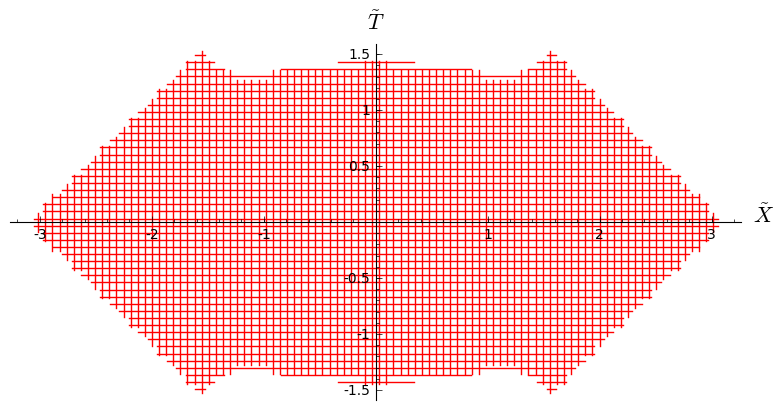

In [27]:
X_C.plot(X_C, ambient_coords=(X1,T1), number_values=100)

The transition map from Kruskal-Szekeres coordinates to the compactified ones:

In [28]:
KS_to_C = X_KS.transition_map(X_C, [atan(asinh(T+X))+atan(asinh(T-X)),
                                    atan(asinh(T+X))-atan(asinh(T-X)), 
                                    th, ph])
print(KS_to_C)
KS_to_C.display()

Change of coordinates from Chart (M, (T, X, th, ph)) to Chart (M, (T1, X1, th, ph))


T1 = arctan(arcsinh(T + X)) + arctan(arcsinh(T - X))
X1 = arctan(arcsinh(T + X)) - arctan(arcsinh(T - X))
th = th
ph = ph

### Transition map between the Schwarzschild-Droste chart and the chart of compactified coordinates

The transition map is obtained by composition of previously defined ones:

In [29]:
SD_I_to_C = KS_to_C.restrict(M_I) * SD_I_to_KS
print(SD_I_to_C)
SD_I_to_C.display()

Change of coordinates from Chart (M_I, (t, r, th, ph)) to Chart (M_I, (T1, X1, th, ph))


T1 = arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m))) + arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m)))
X1 = arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m))) - arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m)))
th = th
ph = ph

In [30]:
SD_II_to_C = KS_to_C.restrict(M_II) * SD_II_to_KS
print(SD_II_to_C)
SD_II_to_C.display()

Change of coordinates from Chart (M_II, (t, r, th, ph)) to Chart (M_II, (T1, X1, th, ph))


T1 = arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m))) - arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m)))
X1 = arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m))) + arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m)))
th = th
ph = ph

In [31]:
SD_III_to_C = KS_to_C.restrict(M_III) * SD_III_to_KS
print(SD_III_to_C)
SD_III_to_C.display()

Change of coordinates from Chart (M_III, (t, r, th, ph)) to Chart (M_III, (T1, X1, th, ph))


T1 = -arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m))) - arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m)))
X1 = -arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m))) + arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(-2*m + r)/sqrt(m)))
th = th
ph = ph

In [32]:
SD_IV_to_C = KS_to_C.restrict(M_IV) * SD_IV_to_KS
print(SD_IV_to_C)
SD_IV_to_C.display()

Change of coordinates from Chart (M_IV, (t, r, th, ph)) to Chart (M_IV, (T1, X1, th, ph))


T1 = -arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m))) + arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m)))
X1 = -arctan(arcsinh(1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) + sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m))) - arctan(arcsinh(-1/2*(sqrt(2)*cosh(1/4*t/m)*e^(1/4*r/m) - sqrt(2)*e^(1/4*r/m)*sinh(1/4*t/m))*sqrt(2*m - r)/sqrt(m)))
th = th
ph = ph

##  Carter-Penrose diagram

The diagram is obtained by plotting the curves of constant Schwarzschild-Droste coordinates with respect to the compactified chart.

In [33]:
r_tab = [2.01*m, 2.1*m, 2.5*m, 4*m, 8*m, 12*m, 20*m, 100*m]
curves_t = dict()
for r0 in r_tab:
    curves_t[r0] = M.curve({X_SD_I: [t, r0, pi/2, pi]}, (t,-oo,+oo))
    curves_t[r0].coord_expr(X_C.restrict(M_I))

In [34]:
graph_t = Graphics()
for r0 in r_tab:
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-150, -10), 
                                 parameters={m:1}, plot_points=100, color='blue', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-10, 10), 
                                 parameters={m:1}, plot_points=100, color='blue', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(10, 150), 
                                 parameters={m:1}, plot_points=100, color='blue', style='--')

In [35]:
t_tab = [-50*m, -20*m, -10*m, -5*m, -2*m, 0, 2*m, 5*m, 10*m, 20*m, 50*m]
curves_r = dict()
for t0 in t_tab:
    curves_r[t0] = M.curve({X_SD_I: [t0, r, pi/2, pi]}, (r, 2*m, +oo))
    curves_r[t0].coord_expr(X_C.restrict(M_I))

In [36]:
graph_r = Graphics()
for t0 in t_tab:
    graph_r += curves_r[t0].plot(X_C, ambient_coords=(X1,T1), prange=(2.0001, 4), 
                                 parameters={m:1}, plot_points=100, color='blue')    
    graph_r += curves_r[t0].plot(X_C, ambient_coords=(X1,T1), prange=(4, 1000), 
                                 parameters={m:1}, plot_points=100, color='blue')

In [37]:
bifhor = line([(-pi/2,-pi/2), (pi/2,pi/2)], color='black', thickness=3) + \
         line([(-pi/2,pi/2), (pi/2,-pi/2)], color='black', thickness=3) + \
         text(r'$\mathscr{H}$', (1, 1.2), fontsize=20, color='black')

In [38]:
sing1 = X_SD_II.plot(X_C, fixed_coords={r:0, th:pi/2, ph:pi}, ambient_coords=(X1,T1),
                    max_range=200, number_values=30, color='brown', thickness=3, 
                    style='--', parameters={m:1}) + \
        text(r'$r=0$', (0.4, 1.55), fontsize=16, color='brown')
sing2 = X_SD_IV.plot(X_C, fixed_coords={r:0, th:pi/2, ph:pi}, ambient_coords=(X1,T1),
                    max_range=200, number_values=30, color='brown', thickness=3, 
                    style='--', parameters={m:1}) + \
        text(r"$r'=0$", (0.4, -1.55), fontsize=16, color='brown')
sing = sing1 + sing2

In [39]:
scri = line([(pi,0), (pi/2,pi/2)], color='green', thickness=3) + \
       text(r"$\mathscr{I}^+$", (2.6, 0.9), fontsize=20, color='green') + \
       line([(pi/2, -pi/2), (pi,0)], color='green', thickness=3) + \
       text(r"$\mathscr{I}^-$", (2.55, -0.9), fontsize=20, color='green') + \
       line([(-pi,0), (-pi/2,pi/2)], color='green', thickness=3) + \
       text(r"${\mathscr{I}'}^+$", (-2.55, 0.9), fontsize=20, color='green') + \
       line([(-pi/2, -pi/2), (-pi,0)], color='green', thickness=3) + \
       text(r"${\mathscr{I}'}^-$", (-2.6, -0.9), fontsize=20, color='green')

In [40]:
region_labels = text(r'$\mathscr{M}_{\rm I}$', (2, 0.4), fontsize=20, color='blue', 
                     background_color='white') + \
                text(r'$\mathscr{M}_{\rm II}$', (0.4, 1), fontsize=20, color='steelblue',
                     background_color='white') + \
                text(r'$\mathscr{M}_{\rm III}$', (-2, 0.4), fontsize=20, color='chocolate',
                     background_color='white') + \
                text(r'$\mathscr{M}_{\rm IV}$', (0.4, -1), fontsize=20, color='gold',
                     background_color='white')

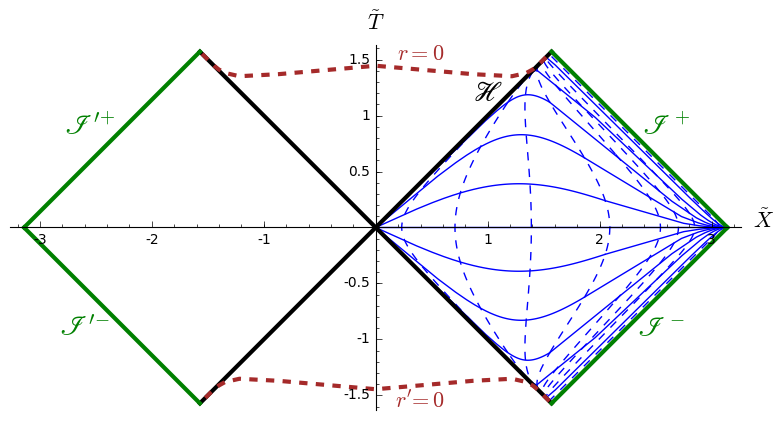

In [41]:
graph = graph_t + graph_r
show(graph + bifhor + sing + scri, aspect_ratio=1)

In [42]:
r_tab = [0.1*m, 0.5*m, m, 1.25*m, 1.5*m, 1.7*m, 1.9*m, 1.98*m]
curves_t = dict()
for r0 in r_tab:
    curves_t[r0] = M.curve({X_SD_II: [t, r0, pi/2, pi]}, (t,-oo,+oo))
    curves_t[r0].coord_expr(X_C.restrict(M_II))

In [43]:
graph_t = Graphics()
for r0 in r_tab:
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-150, -2), 
                                 parameters={m:1}, plot_points=50, color='steelblue', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-2, 2), 
                                 parameters={m:1}, plot_points=50, color='steelblue', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(2, 150), 
                                 parameters={m:1}, plot_points=50, color='steelblue', style='--')

In [44]:
t_tab = [-20*m, -10*m, -5*m, -2*m, 0, 2*m, 5*m, 10*m, 20*m]
curves_r = dict()
for t0 in t_tab:
    curves_r[t0] = M.curve({X_SD_II: [t0, r, pi/2, pi]}, (r, 0, 2*m))
    curves_r[t0].coord_expr(X_C.restrict(M_II))

In [45]:
graph_r = Graphics()
for t0 in t_tab:
    graph_r += curves_r[t0].plot(X_C, ambient_coords=(X1,T1), prange=(0.001, 1.9999), 
                                 parameters={m:1}, plot_points=100, color='steelblue')    

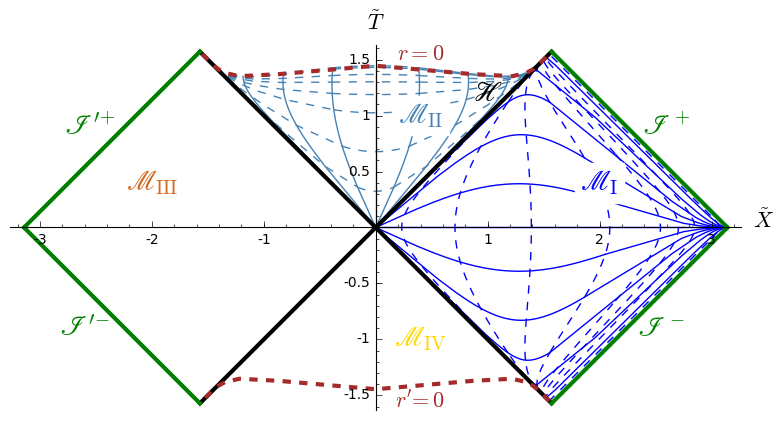

In [46]:
graph += graph_t + graph_r
show(graph + bifhor + sing + scri + region_labels, aspect_ratio=1)

In [47]:
r_tab = [2.01*m, 2.1*m, 2.5*m, 4*m, 8*m, 12*m, 20*m, 100*m]
curves_t = dict()
for r0 in r_tab:
    curves_t[r0] = M.curve({X_SD_III: [t, r0, pi/2, pi]}, (t,-oo,+oo))
    curves_t[r0].coord_expr(X_C.restrict(M_III))

In [48]:
graph_t = Graphics()
for r0 in r_tab:
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-150, -10), 
                                 parameters={m:1}, plot_points=100, color='chocolate', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-10, 10), 
                                 parameters={m:1}, plot_points=100, color='chocolate', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(10, 150), 
                                 parameters={m:1}, plot_points=100, color='chocolate', style='--')

In [49]:
t_tab = [-50*m, -20*m, -10*m, -5*m, -2*m, 0, 2*m, 5*m, 10*m, 20*m, 50*m]
curves_r = dict()
for t0 in t_tab:
    curves_r[t0] = M.curve({X_SD_III: [t0, r, pi/2, pi]}, (r, 2*m, +oo))
    curves_r[t0].coord_expr(X_C.restrict(M_III))

In [50]:
graph_r = Graphics()
for t0 in t_tab:
    graph_r += curves_r[t0].plot(X_C, ambient_coords=(X1,T1), prange=(2.0001, 4), 
                                 parameters={m:1}, plot_points=100, color='chocolate')    
    graph_r += curves_r[t0].plot(X_C, ambient_coords=(X1,T1), prange=(4, 1000), 
                                 parameters={m:1}, plot_points=100, color='chocolate')

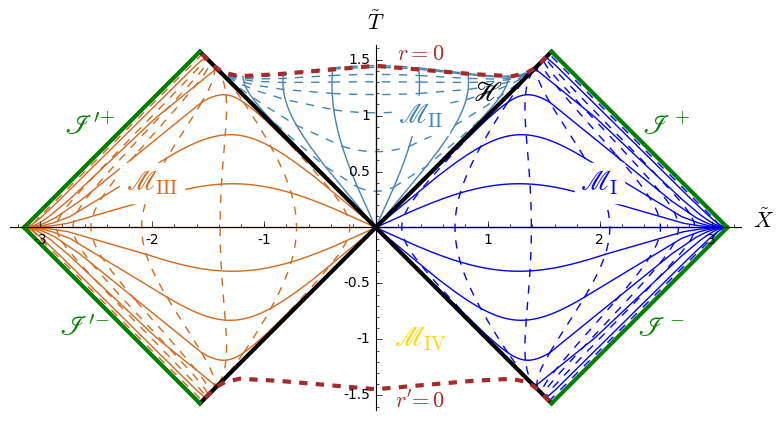

In [51]:
graph += graph_t + graph_r
show(graph + bifhor + sing + scri + region_labels, aspect_ratio=1)

In [52]:
r_tab = [0.1*m, 0.5*m, m, 1.25*m, 1.5*m, 1.7*m, 1.9*m, 1.98*m]
curves_t = dict()
for r0 in r_tab:
    curves_t[r0] = M.curve({X_SD_IV: [t, r0, pi/2, pi]}, (t,-oo,+oo))
    curves_t[r0].coord_expr(X_C.restrict(M_IV))

In [53]:
graph_t = Graphics()
for r0 in r_tab:
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-150, -2), 
                                 parameters={m:1}, plot_points=50, color='gold', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(-2, 2), 
                                 parameters={m:1}, plot_points=50, color='gold', style='--')
    graph_t += curves_t[r0].plot(X_C, ambient_coords=(X1,T1), prange=(2, 150), 
                                 parameters={m:1}, plot_points=50, color='gold', style='--')

In [54]:
t_tab = [-20*m, -10*m, -5*m, -2*m, 0, 2*m, 5*m, 10*m, 20*m]
curves_r = dict()
for t0 in t_tab:
    curves_r[t0] = M.curve({X_SD_IV: [t0, r, pi/2, pi]}, (r, 0, 2*m))
    curves_r[t0].coord_expr(X_C.restrict(M_IV))

In [55]:
graph_r = Graphics()
for t0 in t_tab:
    graph_r += curves_r[t0].plot(X_C, ambient_coords=(X1,T1), prange=(0.001, 1.9999), 
                                 parameters={m:1}, plot_points=100, color='gold')    

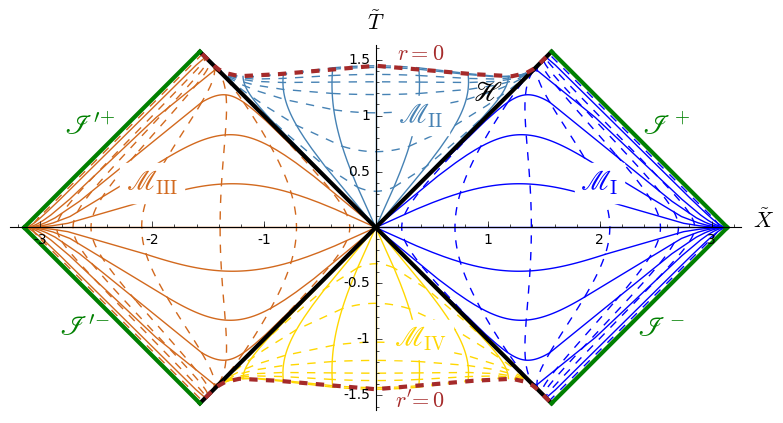

In [56]:
graph += graph_t + graph_r
graph += bifhor + sing + scri + region_labels
show(graph, aspect_ratio=1)

In [57]:
graph.save('max_carter-penrose-FN.pdf', aspect_ratio=1)